In [5]:
import numpy as np
import pandas as pd
import random
import collections
from sklearn.base import clone
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.sparse import coo_matrix
from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [6]:
def plotDataset(X, y):
    for label in np.unique(y):
        plt.scatter(X[y == label, 0], X[y == label, 1], label=label)
    plt.legend()
    plt.show()

In [43]:
def plotEstimator(trX, trY, teX, teY, estimator, title=''):
#    estimator = clone(estimator).fit(trX, trY)
    h = .02
    x_min, x_max = teX[:, 0].min() - .5, teX[:, 0].max() + .5
    y_min, y_max = teX[:, 1].min() - .5, teX[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    Z = estimator.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
    # plt.legend()
    plt.title(title)
    plt.show()

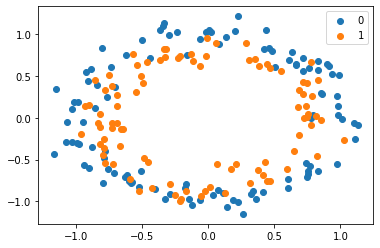

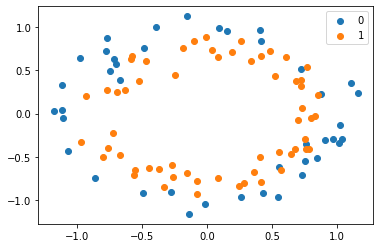

In [23]:
rs = 0
X, y = make_circles(300, noise=0.1, random_state=rs)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=rs)
plotDataset(X_train, y_train)
plotDataset(X_test, y_test)

## Decition Tree

Accuracy Score:60.6%


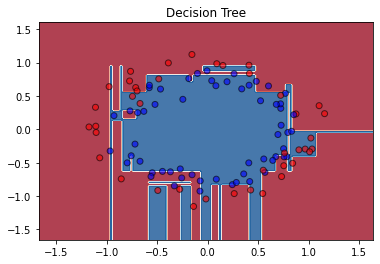

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
estimator = DecisionTreeClassifier(criterion="gini",random_state=rs)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
dtAccuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy Score:{dtAccuracy:.1f}%')
plotEstimator(X_train, y_train, X_test, y_test, estimator, 'Decision Tree')

Accuracy Score:66.7%


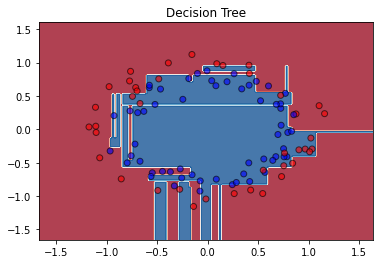

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
estimator = DecisionTreeClassifier(criterion="entropy",random_state=rs)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
dtAccuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy Score:{dtAccuracy:.1f}%')
plotEstimator(X_train, y_train, X_test, y_test, estimator, 'Decision Tree')

## Q5

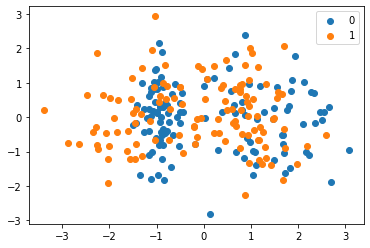

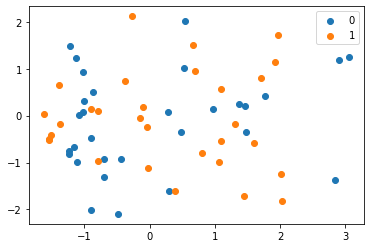

In [26]:
from sklearn.datasets import make_classification
rs = 0
X, y = make_classification(300, random_state=rs)
trX, teX, trY, teY = train_test_split(X, y, test_size=0.2,random_state=rs)
plotDataset(trX, trY)
plotDataset(teX,teY)

In [27]:
def plot_importance(importance, title):
    plt.bar([x for x in range(len(importance))], importance)
    plt.xticks([x for x in range(len(importance))])
    plt.title(title)
    plt.show()

In [28]:
def plot_importance_accuracy(values, accuracies_values, title):
    plt.figure(figsize=(9,5), dpi=100)
    plt.plot(values, accuracies_values[0], color='red', marker='o', 
                     linestyle='dashed', label = 'First_fold')
    plt.plot(values, accuracies_values[1], color='blue', marker='o',
                     linestyle='dashed', label = 'Second_fold')
    plt.plot(values, accuracies_values[2], color='orange', marker='o',
                     linestyle='dashed', label = 'Third_fold')
    plt.plot(values, accuracies_values[3], color='green', marker='o',
                     linestyle='dashed', label = 'Fourth_fold')
    plt.title(title)
    plt.xlabel('important Features')
    plt.ylabel('Accuracy %')
    plt.xticks(values)
    plt.yticks(range(70,101))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show

In [29]:
def plot_importance_testaccuracy(values, test_accuracy_values, title):
    plt.figure(figsize=(9,5), dpi=100)
    plt.plot(values, test_accuracy_values, color='red', marker='o', 
                     linestyle='dashed', label = 'important_features')
    plt.title(title)
    plt.xlabel('important Features')
    plt.ylabel('Accuracy %')
    plt.xticks(values)
    plt.yticks(range(70,101))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show

In [30]:
estimator_class = DecisionTreeClassifier(criterion="gini",random_state=rs)
estimator_class.fit(trX, trY)
y_pred_class = estimator_class.predict(teX)
dtre_Accuracy = accuracy_score(teY, y_pred_class)
important_feature = estimator_class.feature_importances_

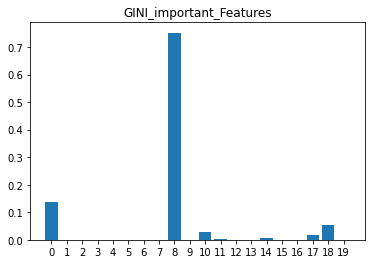

In [31]:
plot_importance(important_feature, 'GINI_important_Features')

In [32]:
sorted_importance_feature = np.argsort(important_feature)[::-1]
sorted_importance_feature

array([ 8,  0, 18, 10, 17, 14, 11,  6,  1,  2,  3,  4,  5, 19,  7, 12, 13,
       15, 16,  9])

In [33]:
imp = sorted_importance_feature[:7]
l1_im,l2_im,l3_im,l4_im,l5_im,l6_im,l7_im = imp[0:1],imp[0:2],imp[0:3],imp[0:4],imp[0:5],imp[0:6],imp
lst = [l1_im, l2_im, l3_im, l4_im, l5_im, l6_im, l7_im]
lst

[array([8]),
 array([8, 0]),
 array([ 8,  0, 18]),
 array([ 8,  0, 18, 10]),
 array([ 8,  0, 18, 10, 17]),
 array([ 8,  0, 18, 10, 17, 14]),
 array([ 8,  0, 18, 10, 17, 14, 11])]

In [34]:
from sklearn.model_selection import cross_validate
fold_accuracy = []
test_accuracy = []
estimator_tree = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
for i in lst:
    cv_results = cross_validate(estimator_tree, trX[:, i], trY, cv = 4)
    fold_accuracy.append(cv_results['test_score']*100)
    #fit the model to obtain the test accuracy
    estimator_tree.fit(trX[:, i], trY)
    y_preds = estimator_tree.predict(teX[:, i])
    accuracy =  accuracy_score(teY, y_preds)
    test_accuracy.append(accuracy* 100)
accuracies_fold = list(map(list, zip(*fold_accuracy)))

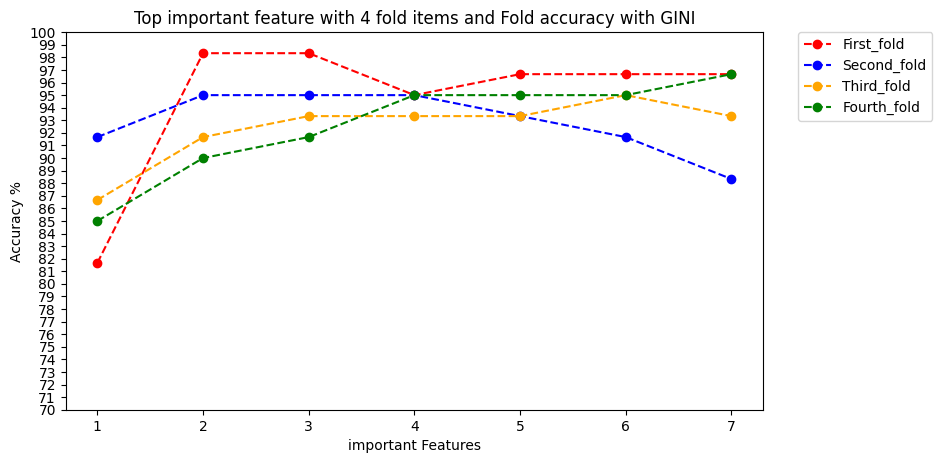

In [35]:
plot_importance_accuracy(range(1,8), accuracies_fold, "Top important feature with 4 fold items and Fold accuracy with GINI")

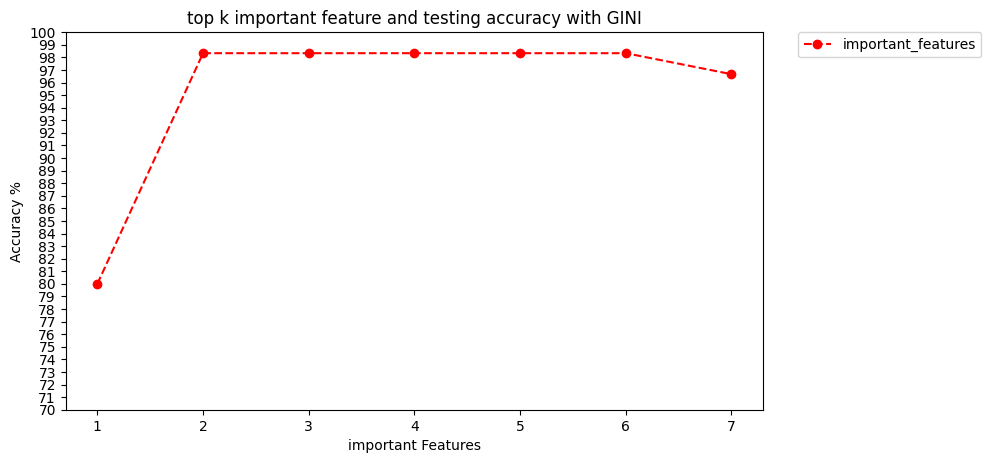

In [36]:
plot_importance_testaccuracy(range(1,8), test_accuracy, "top k important feature and testing accuracy with GINI")

## Bagging

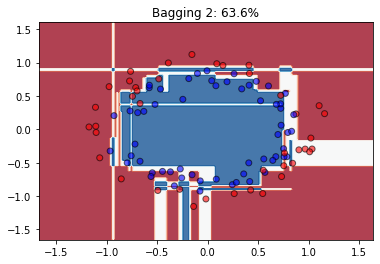

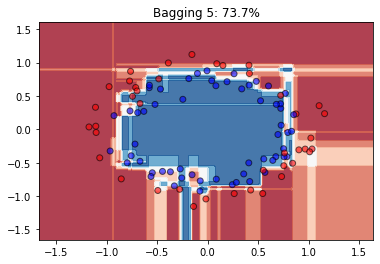

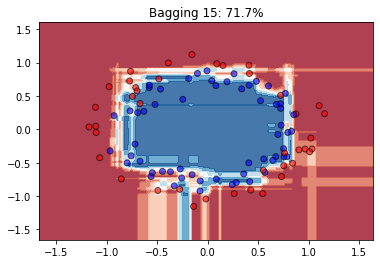

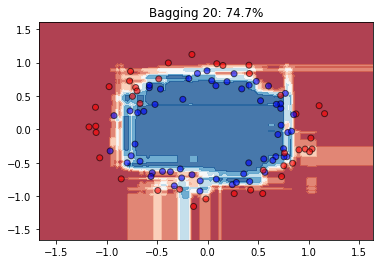

In [37]:
from sklearn.ensemble import BaggingClassifier

for nEst in [2,5,15,20]:    
    estimator = BaggingClassifier(n_estimators=nEst, random_state=rs)
    score = estimator.fit(X_train, y_train).score(X_test, y_test)*100
    plotEstimator(X_train, y_train, X_test, y_test, estimator, f'Bagging {nEst}: {score:.1f}%')

## Random Forest

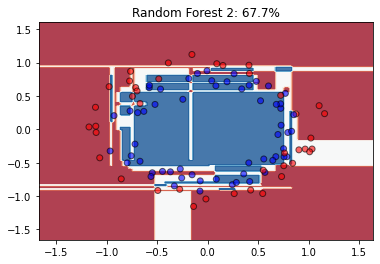

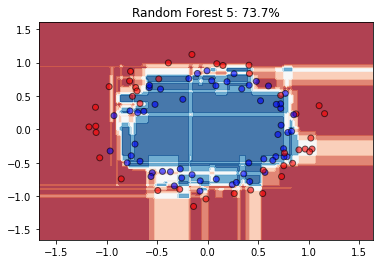

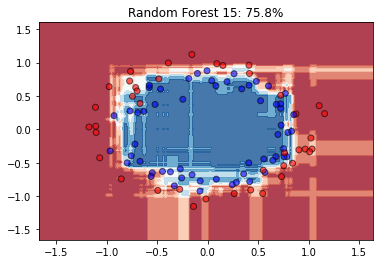

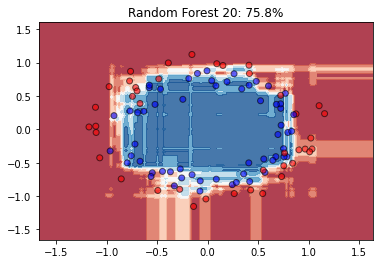

In [38]:
from sklearn.ensemble import RandomForestClassifier

for nEst in [2,5,15,20]:    
    estimator = RandomForestClassifier(n_estimators=nEst, random_state=rs)
    score = estimator.fit(X_train, y_train).score(X_test, y_test)*100
    plotEstimator(X_train, y_train, X_test, y_test, estimator, f'Random Forest {nEst}: {score:.1f}%')

## AdaBoost

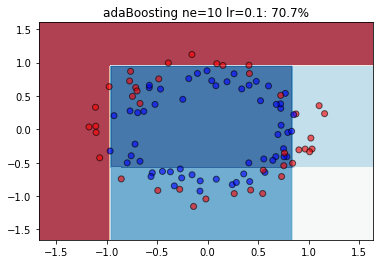

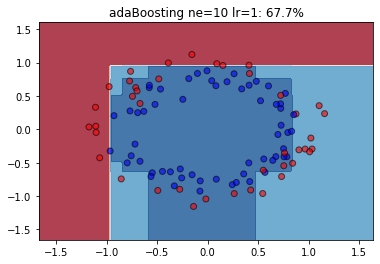

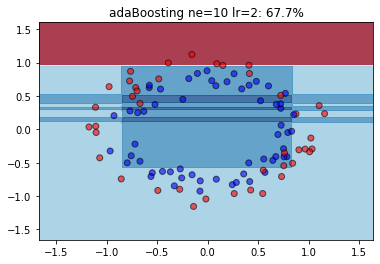

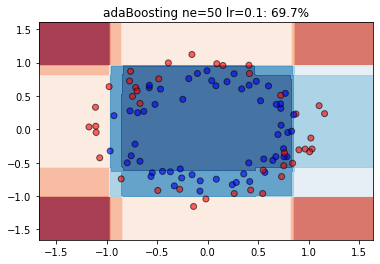

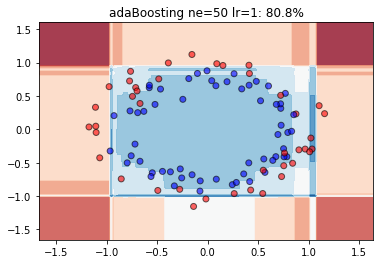

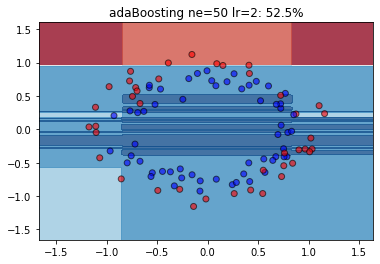

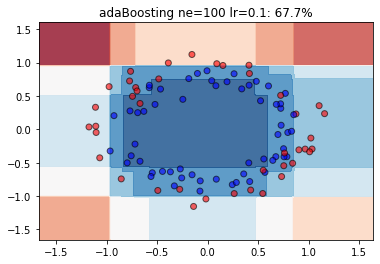

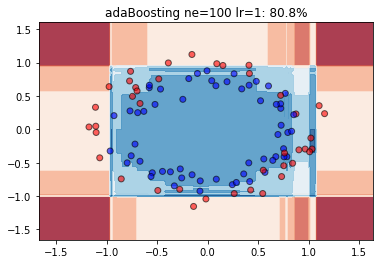

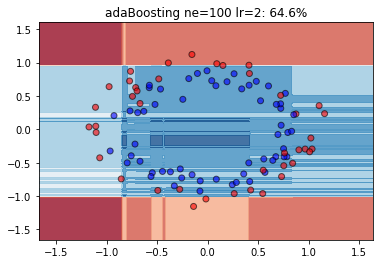

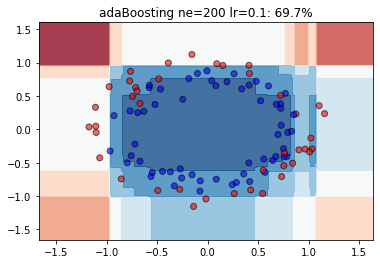

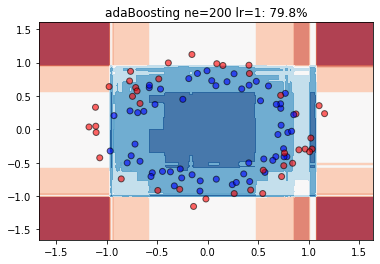

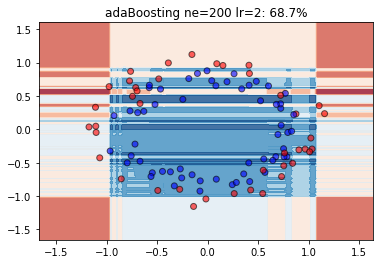

In [39]:
from sklearn.ensemble import AdaBoostClassifier

for estimator in [10,50,100,200]:
    for learning_rate in [0.1,1,2]:
        classifier = AdaBoostClassifier(n_estimators=estimator,
                                        learning_rate=learning_rate,
                                        random_state=rs)
        score = classifier.fit(X_train, y_train).score(X_test, y_test)*100
        plotEstimator(X_train, y_train, X_test, y_test, classifier,
                      f'adaBoosting ne={estimator} lr={learning_rate}: {score:.1f}%')

## Stacking

In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

Baselines Score:
DecisionTreeClassifier: 60.6%


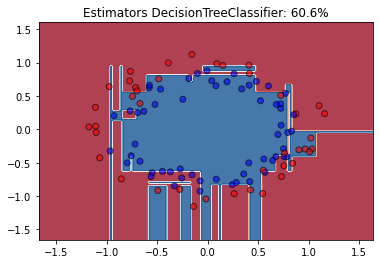

BaggingClassifier: 74.7%


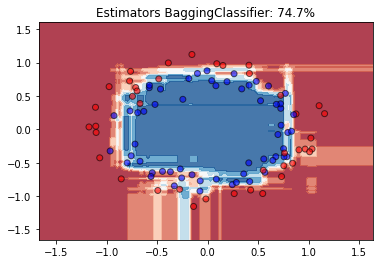

AdaBoostClassifier: 80.8%


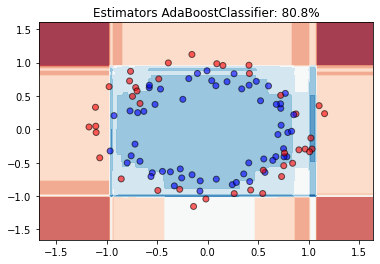

RandomForestClassifier: 75.8%


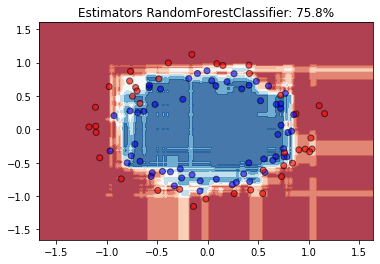

In [44]:
rs = 0

estimators = [DecisionTreeClassifier(random_state=rs),
             BaggingClassifier(n_estimators=20, random_state=rs),
             AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=rs),
             RandomForestClassifier(n_estimators=15, random_state=rs)]
estimators = {estimator.__class__.__name__: estimator for estimator in estimators}

print(f'Baselines Score:')
for estName, est in estimators.items():
    est = clone(est).fit(X_train, y_train)
    predY = est.predict(X_test)
    acc = accuracy_score(y_test, predY)*100
    print(f'{estName}: {acc:.1f}%')
    plotEstimator(X_train, y_train, X_test, y_test, est, f'Estimators {estName}: {acc:.1f}%')

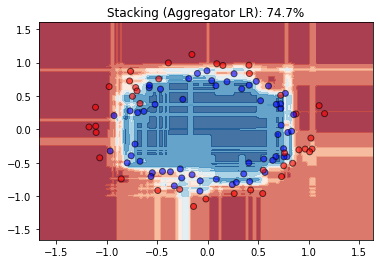

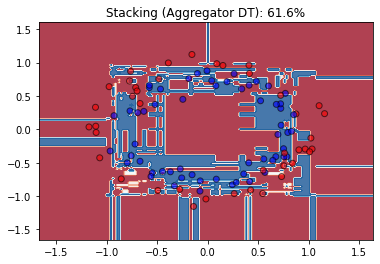

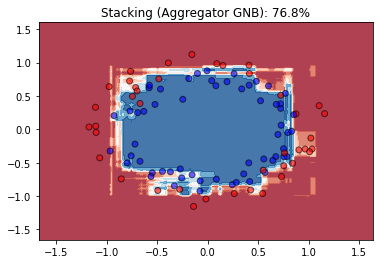

In [45]:
stacking = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], LogisticRegression(random_state=rs), n_jobs=-1)
stacking.fit(X_train, y_train)
predY = stacking.predict(X_test)
acc = accuracy_score(y_test, predY)*100
plotEstimator(X_train, y_train, X_test, y_test, stacking, f'Stacking (Aggregator LR): {acc:.1f}%')

stacking = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], DecisionTreeClassifier(random_state=rs), n_jobs=-1)
stacking.fit(X_train, y_train)
predY = stacking.predict(X_test)
acc = accuracy_score(y_test, predY)*100
plotEstimator(X_train, y_train, X_test, y_test, stacking,f'Stacking (Aggregator DT): {acc:.1f}%')

stacking = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], GaussianNB(), n_jobs=-1)
stacking.fit(X_train, y_train)
predY = stacking.predict(X_test)
acc = accuracy_score(y_test, predY)*100
plotEstimator(X_train, y_train, X_test, y_test, stacking,f'Stacking (Aggregator GNB): {acc:.1f}%')